# Análisis Estadístico de los datos
En este notebook nos centraremos en analizar el archivo `OTUS_conservados.csv`

In [1]:
#! pip install contextily geopandas matplotlib numpy pandas seaborn

In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA

## Lectura de datos

In [2]:
data_path = "./data"

In [5]:
metadata = pd.read_csv(f"{data_path}/metadata_agave_clavi_solena - metadata.csv", index_col="sample_id")
metadata.head()

,Experiment,Assay Type,seq_type,Organism,plant_part,host_name,latitude,longitude,state,country,continent
sample_id,,,,,,,,,,,
SRR10127267,SRX6855687,WGS,Shotgun,plant metagenome,Phylosphere,Agave Tequilana,21.7658,-100.163,Jalisco,Mexico,North America
SRR10127271,SRX6855691,WGS,Shotgun,plant metagenome,Phylosphere,Myrtillocactus Geometrizans,21.7658,-100.163,Guanajuato,Mexico,North America
SRR10591223,SRX7271075,WGA,16S,rhizosphere metagenome,Rhizosphere,Cephalocereus polylophus,20.5900,-100.380,Queretaro,Mexico,North America
SRR10591224,SRX7271074,WGA,16S,rhizosphere metagenome,Rhizosphere,Cephalocereus polylophus,20.5900,-100.380,Queretaro,Mexico,North America
SRR10591225,SRX7271073,WGA,16S,rhizosphere metagenome,Rhizosphere,Cephalocereus polylophus,20.5900,-100.380,Queretaro,Mexico,North America


## Información básica

In [6]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, SRR10127267 to t-nG3jM2TOMPOOA051345
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experiment  252 non-null    object 
 1   Assay Type  252 non-null    object 
 2   seq_type    249 non-null    object 
 3   Organism    248 non-null    object 
 4   plant_part  150 non-null    object 
 5   host_name   289 non-null    object 
 6   latitude    287 non-null    float64
 7   longitude   287 non-null    float64
 8   state       260 non-null    object 
 9   country     287 non-null    object 
 10  continent   287 non-null    object 
dtypes: float64(2), object(9)
memory usage: 27.1+ KB


In [7]:
metadata.describe()

,latitude,longitude
count,287.000000,287.000000
mean,28.564543,9.063473
std,13.357131,107.602231
min,-26.110000,-122.759800
25%,22.640250,-101.267029
50%,34.248700,27.330000
75%,36.750000,115.200000
max,56.000000,127.970000


## Mapas

In [8]:
metadata_gdf = gpd.GeoDataFrame(metadata.copy(), geometry=gpd.points_from_xy(metadata['longitude'], metadata['latitude']), crs='EPSG:4326')
metadata_gdf

,Experiment,Assay Type,seq_type,Organism,plant_part,host_name,latitude,longitude,state,country,continent,geometry
sample_id,,,,,,,,,,,,
SRR10127267,SRX6855687,WGS,Shotgun,plant metagenome,Phylosphere,Agave Tequilana,21.765800,-100.163000,Jalisco,Mexico,North America,POINT (-100.16300 21.76580)
SRR10127271,SRX6855691,WGS,Shotgun,plant metagenome,Phylosphere,Myrtillocactus Geometrizans,21.765800,-100.163000,Guanajuato,Mexico,North America,POINT (-100.16300 21.76580)
SRR10591223,SRX7271075,WGA,16S,rhizosphere metagenome,Rhizosphere,Cephalocereus polylophus,20.590000,-100.380000,Queretaro,Mexico,North America,POINT (-100.38000 20.59000)
SRR10591224,SRX7271074,WGA,16S,rhizosphere metagenome,Rhizosphere,Cephalocereus polylophus,20.590000,-100.380000,Queretaro,Mexico,North America,POINT (-100.38000 20.59000)
SRR10591225,SRX7271073,WGA,16S,rhizosphere metagenome,Rhizosphere,Cephalocereus polylophus,20.590000,-100.380000,Queretaro,Mexico,North America,POINT (-100.38000 20.59000)
...,...,...,...,...,...,...,...,...,...,...,...,...
t-AYtCM2TOMPOOA100360,NaN,NaN,NaN,NaN,NaN,Solanum lycopersicum,21.019015,-101.257359,Guanajuato,Mexico,North America,POINT (-101.25736 21.01901)
t-DYZgM2TOMPOOB100370,NaN,NaN,NaN,NaN,NaN,Solanum lycopersicum,21.019015,-101.257359,Guanajuato,Mexico,North America,POINT (-101.25736 21.01901)
t-eBCjM2CHIPOOBXX1180,NaN,NaN,NaN,NaN,NaN,Capsicum,25.172109,-107.479517,Sinaloa,Mexico,North America,POINT (-107.47952 25.17211)


## Gráficas

**Distribución de *New_Labels***

In [15]:
metadata["host_name"].value_counts()

Zea mays                                  79
Solanum tuberosum                         60
Solanum lycopersicum                      29
Soil of Zea mays and Triticum rotation    22
Capsicum                                  19
Medicago sativa                           18
Dioon Merolae                              8
Cephalocereus polylophus                   6
Echinocactus Platyacanthus                 6
Solanum Lycopersicum                       5
Soil                                       4
Capsicum annuum                            4
Agave Tequilana                            4
Myrtillocactus Geometrizans                4
Opuntia Robusta                            4
Agave Salmiana                             4
Poaceae                                    4
Capsicum annuum var. annuum                3
Phaseolus Vulgaris                         2
Asteraceae                                 1
not applicable                             1
Fagales                                    1
Macroptili

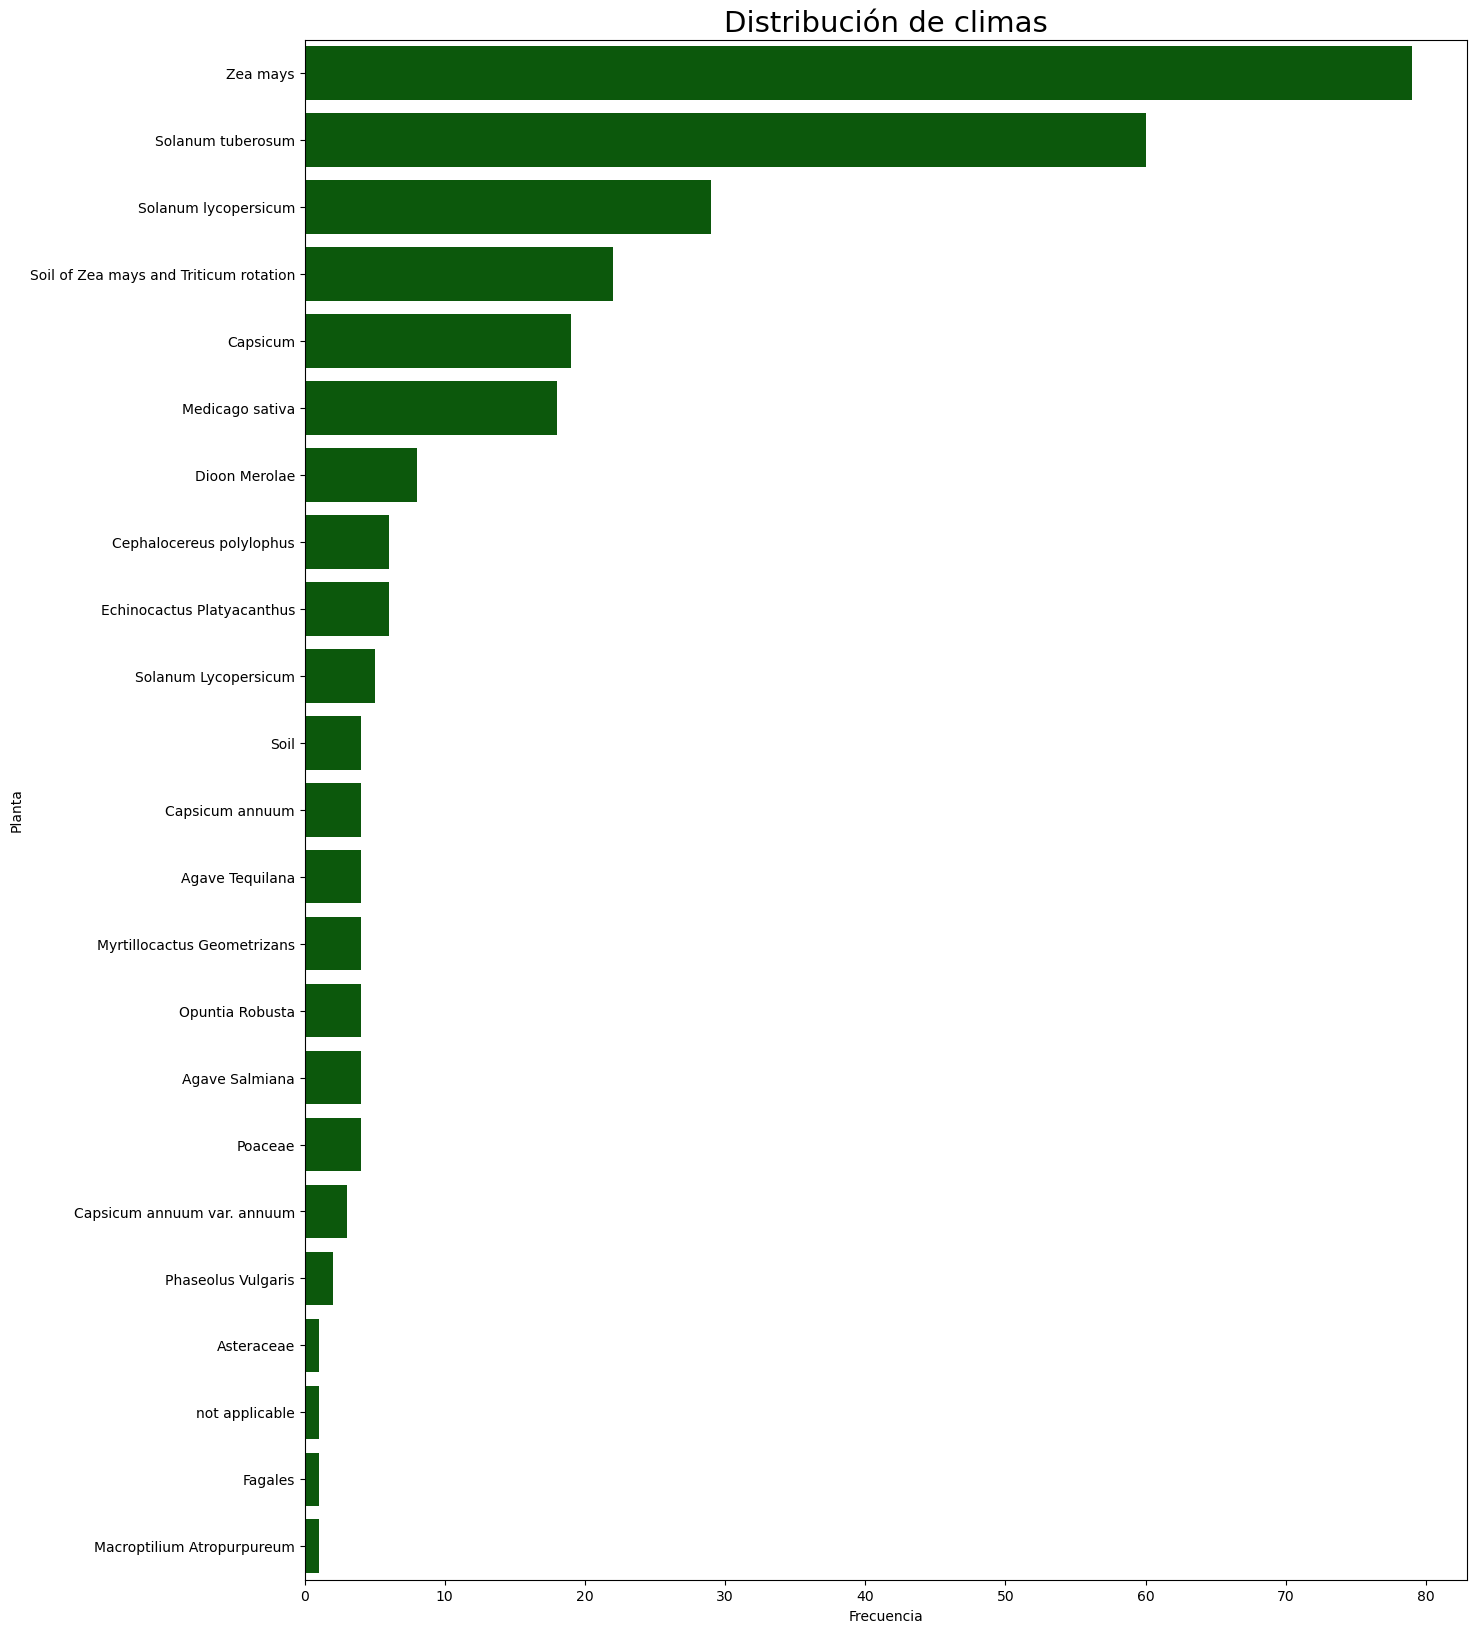

In [16]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=metadata, y="host_name", order=metadata["host_name"].value_counts().index, color="darkgreen")
plt.xlabel("Frecuencia")
plt.ylabel("Planta")
plt.title("Distribución de climas", fontsize=21)
plt.show()